In [299]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
import xgboost as xgb
from sklearn.decomposition import PCA
from category_encoders import *
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
%matplotlib inline
#Plotly
import plotly.express as px
import plotly.graph_objs as go
#Some styling
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
import plotly.io as pio
pio.templates.default = 'presentation'
#Subplots
from plotly.subplots import make_subplots
from scipy import sparse
from scipy.stats import boxcox

In [140]:
#load csv into dataframe

df = pd.read_csv("melb_data.csv")

df.head(15)

Suburb              Address  Rooms Type      Price Method SellerG  \
0   Abbotsford         85 Turner St      2    h  1480000.0      S  Biggin   
1   Abbotsford      25 Bloomburg St      2    h  1035000.0      S  Biggin   
2   Abbotsford         5 Charles St      3    h  1465000.0     SP  Biggin   
3   Abbotsford     40 Federation La      3    h   850000.0     PI  Biggin   
4   Abbotsford          55a Park St      4    h  1600000.0     VB  Nelson   
5   Abbotsford       129 Charles St      2    h   941000.0      S  Jellis   
6   Abbotsford         124 Yarra St      3    h  1876000.0      S  Nelson   
7   Abbotsford        98 Charles St      2    h  1636000.0      S  Nelson   
8   Abbotsford   6/241 Nicholson St      1    u   300000.0      S  Biggin   
9   Abbotsford        10 Valiant St      2    h  1097000.0      S  Biggin   
10  Abbotsford   411/8 Grosvenor St      2    u   700000.0     VB  Jellis   
11  Abbotsford      40 Nicholson St      3    h  1350000.0     VB  Nelson   
12  Abbotsford  123/56 Nicholson St      2    u   750000.0      S  Biggin   
13  Abbotsford        45 William St      2    h  1172500.0      S  Biggin   
14  Abbotsford   7/20 Abbotsford St      1    u   441000.0     SP    Greg   

          Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0    3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0   
1    4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0   
2    4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0   
3    4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0   
4    4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0   
5    7/05/2016       2.5    3067.0  ...       1.0  0.0     181.0   
6    7/05/2016       2.5    3067.0  ...       2.0  0.0     245.0   
7    8/10/2016       2.5    3067.0  ...       1.0  2.0     256.0   
8    8/10/2016       2.5    3067.0  ...       1.0  1.0       0.0   
9    8/10/2016       2.5    3067.0  ...       1.0  2.0     220.0   
10  12/11/2016       2.5    3067.0  ...       2.0  1.0       0.0   
11  12/11/2016       2.5    3067.0  ...       2.0  2.0     214.0   
12  12/11/2016       2.5    3067.0  ...       2.0  1.0       0.0   
13  13/08/2016       2.5    3067.0  ...       1.0  1.0     195.0   
14  14/05/2016       2.5    3067.0  ...       1.0  1.0       0.0   

    BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0            NaN        NaN        Yarra  -37.7996    144.9984   
1           79.0     1900.0        Yarra  -37.8079    144.9934   
2          150.0     1900.0        Yarra  -37.8093    144.9944   
3            NaN        NaN        Yarra  -37.7969    144.9969   
4          142.0     2014.0        Yarra  -37.8072    144.9941   
5            NaN        NaN        Yarra  -37.8041    144.9953   
6          210.0     1910.0        Yarra  -37.8024    144.9993   
7          107.0     1890.0        Yarra  -37.8060    144.9954   
8            NaN        NaN        Yarra  -37.8008    144.9973   
9           75.0     1900.0        Yarra  -37.8010    144.9989   
10           NaN        NaN        Yarra  -37.8110    145.0067   
11         190.0     2005.0        Yarra  -37.8085    144.9964   
12          94.0     2009.0        Yarra  -37.8078    144.9965   
13           NaN        NaN        Yarra  -37.8084    144.9973   
14           NaN        NaN        Yarra  -37.8016    144.9988   

               Regionname Propertycount  
0   Northern Metropolitan        4019.0  
1   Northern Metropolitan        4019.0  
2   Northern Metropolitan        4019.0  
3   Northern Metropolitan        4019.0  
4   Northern Metropolitan        4019.0  
5   Northern Metropolitan        4019.0  
6   Northern Metropolitan        4019.0  
7   Northern Metropolitan        4019.0  
8   Northern Metropolitan        4019.0  
9   Northern Metropolitan        4019.0  
10  Northern Metropolitan        4019.0  
11  Northern Metropolitan        4019.0  
12  Northern Metropolitan        4019.0  
13  Northern Metropolitan        4019.0  

In [141]:
df.describe().T

count          mean            std          min  \
Rooms          13580.0  2.937997e+00       0.955748      1.00000   
Price          13580.0  1.075684e+06  639310.724296  85000.00000   
Distance       13580.0  1.013778e+01       5.868725      0.00000   
Postcode       13580.0  3.105302e+03      90.676964   3000.00000   
Bedroom2       13580.0  2.914728e+00       0.965921      0.00000   
Bathroom       13580.0  1.534242e+00       0.691712      0.00000   
Car            13518.0  1.610075e+00       0.962634      0.00000   
Landsize       13580.0  5.584161e+02    3990.669241      0.00000   
BuildingArea    7130.0  1.519676e+02     541.014538      0.00000   
YearBuilt       8205.0  1.964684e+03      37.273762   1196.00000   
Lattitude      13580.0 -3.780920e+01       0.079260    -38.18255   
Longtitude     13580.0  1.449952e+02       0.103916    144.43181   
Propertycount  13580.0  7.454417e+03    4378.581772    249.00000   

                         25%            50%           75%           max  
Rooms               2.000000       3.000000  3.000000e+00  1.000000e+01  
Price          650000.000000  903000.000000  1.330000e+06  9.000000e+06  
Distance            6.100000       9.200000  1.300000e+01  4.810000e+01  
Postcode         3044.000000    3084.000000  3.148000e+03  3.977000e+03  
Bedroom2            2.000000       3.000000  3.000000e+00  2.000000e+01  
Bathroom            1.000000       1.000000  2.000000e+00  8.000000e+00  
Car                 1.000000       2.000000  2.000000e+00  1.000000e+01  
Landsize          177.000000     440.000000  6.510000e+02  4.330140e+05  
BuildingArea       93.000000     126.000000  1.740000e+02  4.451500e+04  
YearBuilt        1940.000000    1970.000000  1.999000e+03  2.018000e+03  
Lattitude         -37.856822     -37.802355 -3.775640e+01 -3.740853e+01  
Longtitude        144.929600     145.000100  1.450583e+02  1.455264e+02  
Propertycount    4380.000000    6555.000000  1.033100e+04  2.165000e+04

In [142]:
df.shape

(13580, 21)

In [143]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [144]:
# lets check the initial skew of the data!

skw_df = df.copy()

#these are all int type cols
skw_df = skw_df[['Rooms', 'Distance','Bedroom2', 'Bathroom', 'Car', 'Postcode',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude','Propertycount', 'Price']]

skw_df.skew()

Rooms             0.376478
Distance          1.676937
Bedroom2          0.774082
Bathroom          1.377406
Car               1.369676
Postcode          4.076152
Landsize         95.237400
BuildingArea     77.691541
YearBuilt        -1.541279
Lattitude        -0.426695
Longtitude       -0.210991
Propertycount     1.069339
Price             2.239624
dtype: float64

In [ ]:
# Some very, very skewed columns! Lets handle some basic preprocessing first before we step in with any normalisation!

In [148]:
# check for missing values 
df.isnull().values.any()

True

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [151]:
# go into each individual column and deal with the respective context of each that is missing data.
df.isna().sum().sum()

13256

In [152]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [154]:
# Here we can reliably assume that either the data is missing or there are no carparking spaces. 
# there are 2 possibilites here. 1) fill in with existing value (0.0) or 2) create a new unique value which would represent having to pay for parking
# Here i will use 0.1 to denote you must pay for parking, I selected a postive value as this may come in useful with normalisation later 
df['Car'].value_counts()

Car
2.0     5591
1.0     5509
0.0     1026
3.0      748
4.0      506
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: count, dtype: int64

In [155]:
df['Car'] = df['Car'].fillna(0.1)

In [156]:
# as we can see the range is quite large, this is also a large chunck of our dataset. With that in mind it may be best to drop the column entirely 

df['BuildingArea'].describe()

count     7130.000000
mean       151.967650
std        541.014538
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [157]:
df.drop(['BuildingArea'], axis=1, inplace=True)

In [158]:
# Year built is also tricky as there is no accurate way to substitute the missing data (unless you go and actively find it).
# We could assign to a "other" Variable but for ease of this notebook I will drop the missing data 
df = df.dropna(subset=['YearBuilt']) 

In [159]:
# Next is council area. Rather than putting a arbitrary value we can do some quick cross refereing that may give us a better idea of where that area is 
# Filtering the DataFrame where 'CouncilArea' is NaN
filtered_df = df[pd.isna(df['CouncilArea'])]

# Extracting the 'Address' column from the filtered DataFrame
addresses = filtered_df['Suburb']

# Displaying the addresses
print(addresses)

12213       Aberfeldie
12214           Albion
12216           Altona
12218     Altona North
12219         Armadale
             ...      
13575    Wheelers Hill
13576     Williamstown
13577     Williamstown
13578     Williamstown
13579       Yarraville
Name: Suburb, Length: 757, dtype: object


In [160]:
df["Suburb"].value_counts()

Suburb
Reservoir         203
Richmond          170
Brunswick         148
Bentleigh East    135
South Yarra       127
                 ... 
Deepdene            1
Hurstbridge         1
Healesville         1
Officer             1
Kooyong             1
Name: count, Length: 302, dtype: int64

In [161]:
# now check if all suburbs belong to the same council 

# Dropping rows where 'CouncilArea' is NaN to exclude them from the analysis
cleaned_df = df.dropna(subset=['CouncilArea'])

# Grouping by 'Suburb' and checking if all 'CouncilArea' values within each group are the same
unique_council_per_suburb = cleaned_df.groupby('Suburb')['CouncilArea'].nunique()

# Identifying suburbs with more than one unique 'CouncilArea' value
non_unique_council_suburbs = unique_council_per_suburb[unique_council_per_suburb > 1]

# Displaying results
if non_unique_council_suburbs.empty:
    print("All suburbs have the same CouncilArea (excluding NaN values).")
else:
    print("Some suburbs have more than one CouncilArea (excluding NaN values):")
    print(non_unique_council_suburbs)

Some suburbs have more than one CouncilArea (excluding NaN values):
Suburb
Alphington        2
Brighton East     2
Brooklyn          2
Bundoora          3
Burwood           2
Cheltenham        2
Coburg North      2
Elwood            2
Fairfield         2
Fitzroy North     2
Glen Iris         2
Greensborough     2
Hampton East      2
Highett           2
Hillside          2
Kensington        2
Oakleigh South    2
Port Melbourne    2
Preston           2
South Yarra       2
Southbank         2
Surrey Hills      2
Windsor           2
Name: CouncilArea, dtype: int64


In [162]:
# Okay so 24 out of 302 have more than one governing council in their district. Lets see where are nan values are in relation to their suburbs

# Filtering the DataFrame for rows where 'CouncilArea' is NaN
nan_council_df = df[pd.isna(df['CouncilArea'])]

# Extracting unique suburbs from the filtered DataFrame
nan_council_suburbs = nan_council_df['Suburb'].unique()

# Displaying the unique suburbs with NaN in 'CouncilArea'
print("Suburbs with NaN in 'CouncilArea':")
print(nan_council_suburbs)

Suburbs with NaN in 'CouncilArea':
['Aberfeldie' 'Albion' 'Altona' 'Altona North' 'Armadale' 'Ascot Vale'
 'Balaclava' 'Balwyn North' 'Bayswater' 'Bentleigh East' 'Berwick'
 'Black Rock' 'Blackburn North' 'Box Hill' 'Brighton East' 'Brunswick'
 'Brunswick East' 'Bundoora' 'Camberwell' 'Carlton North' 'Caulfield East'
 'Cheltenham' 'Clayton South' 'Clifton Hill' 'Coburg' 'Coolaroo' 'Croydon'
 'Croydon Hills' 'Croydon North' 'Dallas' 'Dandenong' 'Diamond Creek'
 'Doncaster' 'Doncaster East' 'Elwood' 'Essendon' 'Essendon North'
 'Fairfield' 'Fawkner' 'Ferntree Gully' 'Fitzroy' 'Footscray'
 'Forest Hill' 'Frankston' 'Frankston South' 'Gladstone Park' 'Glen Iris'
 'Glenroy' 'Gowanbrae' 'Greenvale' 'Hampton' 'Kealba' 'Kew' 'Kew East'
 'Maidstone' 'Maribyrnong' 'Meadow Heights' 'Melton' 'Melton West'
 'Mentone' 'Moonee Ponds' 'Mulgrave' 'Newport' 'Niddrie' 'North Melbourne'
 'Oakleigh' 'Ormond' 'Parkdale' 'Pascoe Vale' 'Point Cook'
 'Port Melbourne' 'Reservoir' 'Ringwood' 'Roxburgh Park' 'St 

In [163]:
# Lets check the council areas that we can reliably substitute
council_can_sub = []

for i in nan_council_suburbs:
    if i in non_unique_council_suburbs:
        print(i)
    else:
        council_can_sub.append(i)
        

Brighton East
Bundoora
Cheltenham
Elwood
Fairfield
Glen Iris
Port Melbourne
Alphington
Burwood
Greensborough
Highett
Oakleigh South
Preston
South Yarra
Surrey Hills
Windsor
Coburg North
Hillside
Kensington
Hampton East
Fitzroy North


In [164]:
# Great! This means that we can reliably substitute 71% of our missing data! 
print(len(council_can_sub))

215


In [165]:
# Lets create a dictionary of all the council areas that we can substitute! 

# Initialize an empty dictionary to store suburb: council area pairs
suburb_council_dict = {}

for suburb in council_can_sub:
    # Find a non-NaN 'CouncilArea' value for the suburb
    council_area = df[(df['Suburb'] == suburb) & (~pd.isna(df['CouncilArea']))]['CouncilArea'].dropna().unique()
    # Check if we found at least one non-NaN 'CouncilArea' for the suburb
    if len(council_area) > 0:
        # Use the first non-NaN 'CouncilArea' value found as the value for the suburb key in the dictionary
        suburb_council_dict[suburb] = council_area[0]

# Now suburb_council_dict contains the desired mapping
print(suburb_council_dict)

{'Aberfeldie': 'Moonee Valley', 'Albion': 'Brimbank', 'Altona': 'Hobsons Bay', 'Altona North': 'Hobsons Bay', 'Armadale': 'Stonnington', 'Ascot Vale': 'Moonee Valley', 'Balaclava': 'Port Phillip', 'Balwyn North': 'Boroondara', 'Bayswater': 'Knox', 'Bentleigh East': 'Glen Eira', 'Berwick': 'Casey', 'Black Rock': 'Bayside', 'Blackburn North': 'Whitehorse', 'Box Hill': 'Whitehorse', 'Brunswick': 'Moreland', 'Brunswick East': 'Moreland', 'Camberwell': 'Boroondara', 'Carlton North': 'Yarra', 'Caulfield East': 'Glen Eira', 'Clayton South': 'Kingston', 'Clifton Hill': 'Yarra', 'Coburg': 'Moreland', 'Croydon': 'Maroondah', 'Croydon Hills': 'Maroondah', 'Croydon North': 'Maroondah', 'Dallas': 'Hume', 'Dandenong': 'Greater Dandenong', 'Diamond Creek': 'Nillumbik', 'Doncaster': 'Manningham', 'Doncaster East': 'Manningham', 'Essendon': 'Moonee Valley', 'Essendon North': 'Moonee Valley', 'Fawkner': 'Moreland', 'Ferntree Gully': 'Knox', 'Fitzroy': 'Yarra', 'Footscray': 'Maribyrnong', 'Forest Hill': 

In [166]:
# Great lets sub! 
for index, row in df.iterrows():
    # Check if 'CouncilArea' is NaN and 'Suburb' is in the dictionary keys
    if pd.isna(row['CouncilArea']) and row['Suburb'] in suburb_council_dict.keys():
        # Replace the NaN 'CouncilArea' with the value from the dictionary
        df.at[index, 'CouncilArea'] = suburb_council_dict[row['Suburb']]

In [167]:
# lets check thats all taken place by reviewing the nan values
df["CouncilArea"].isna().sum()

95

In [168]:
# Great now we can drop the remaining data points
df = df.dropna(subset=["CouncilArea"])

In [170]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [171]:
df.shape

(8110, 20)

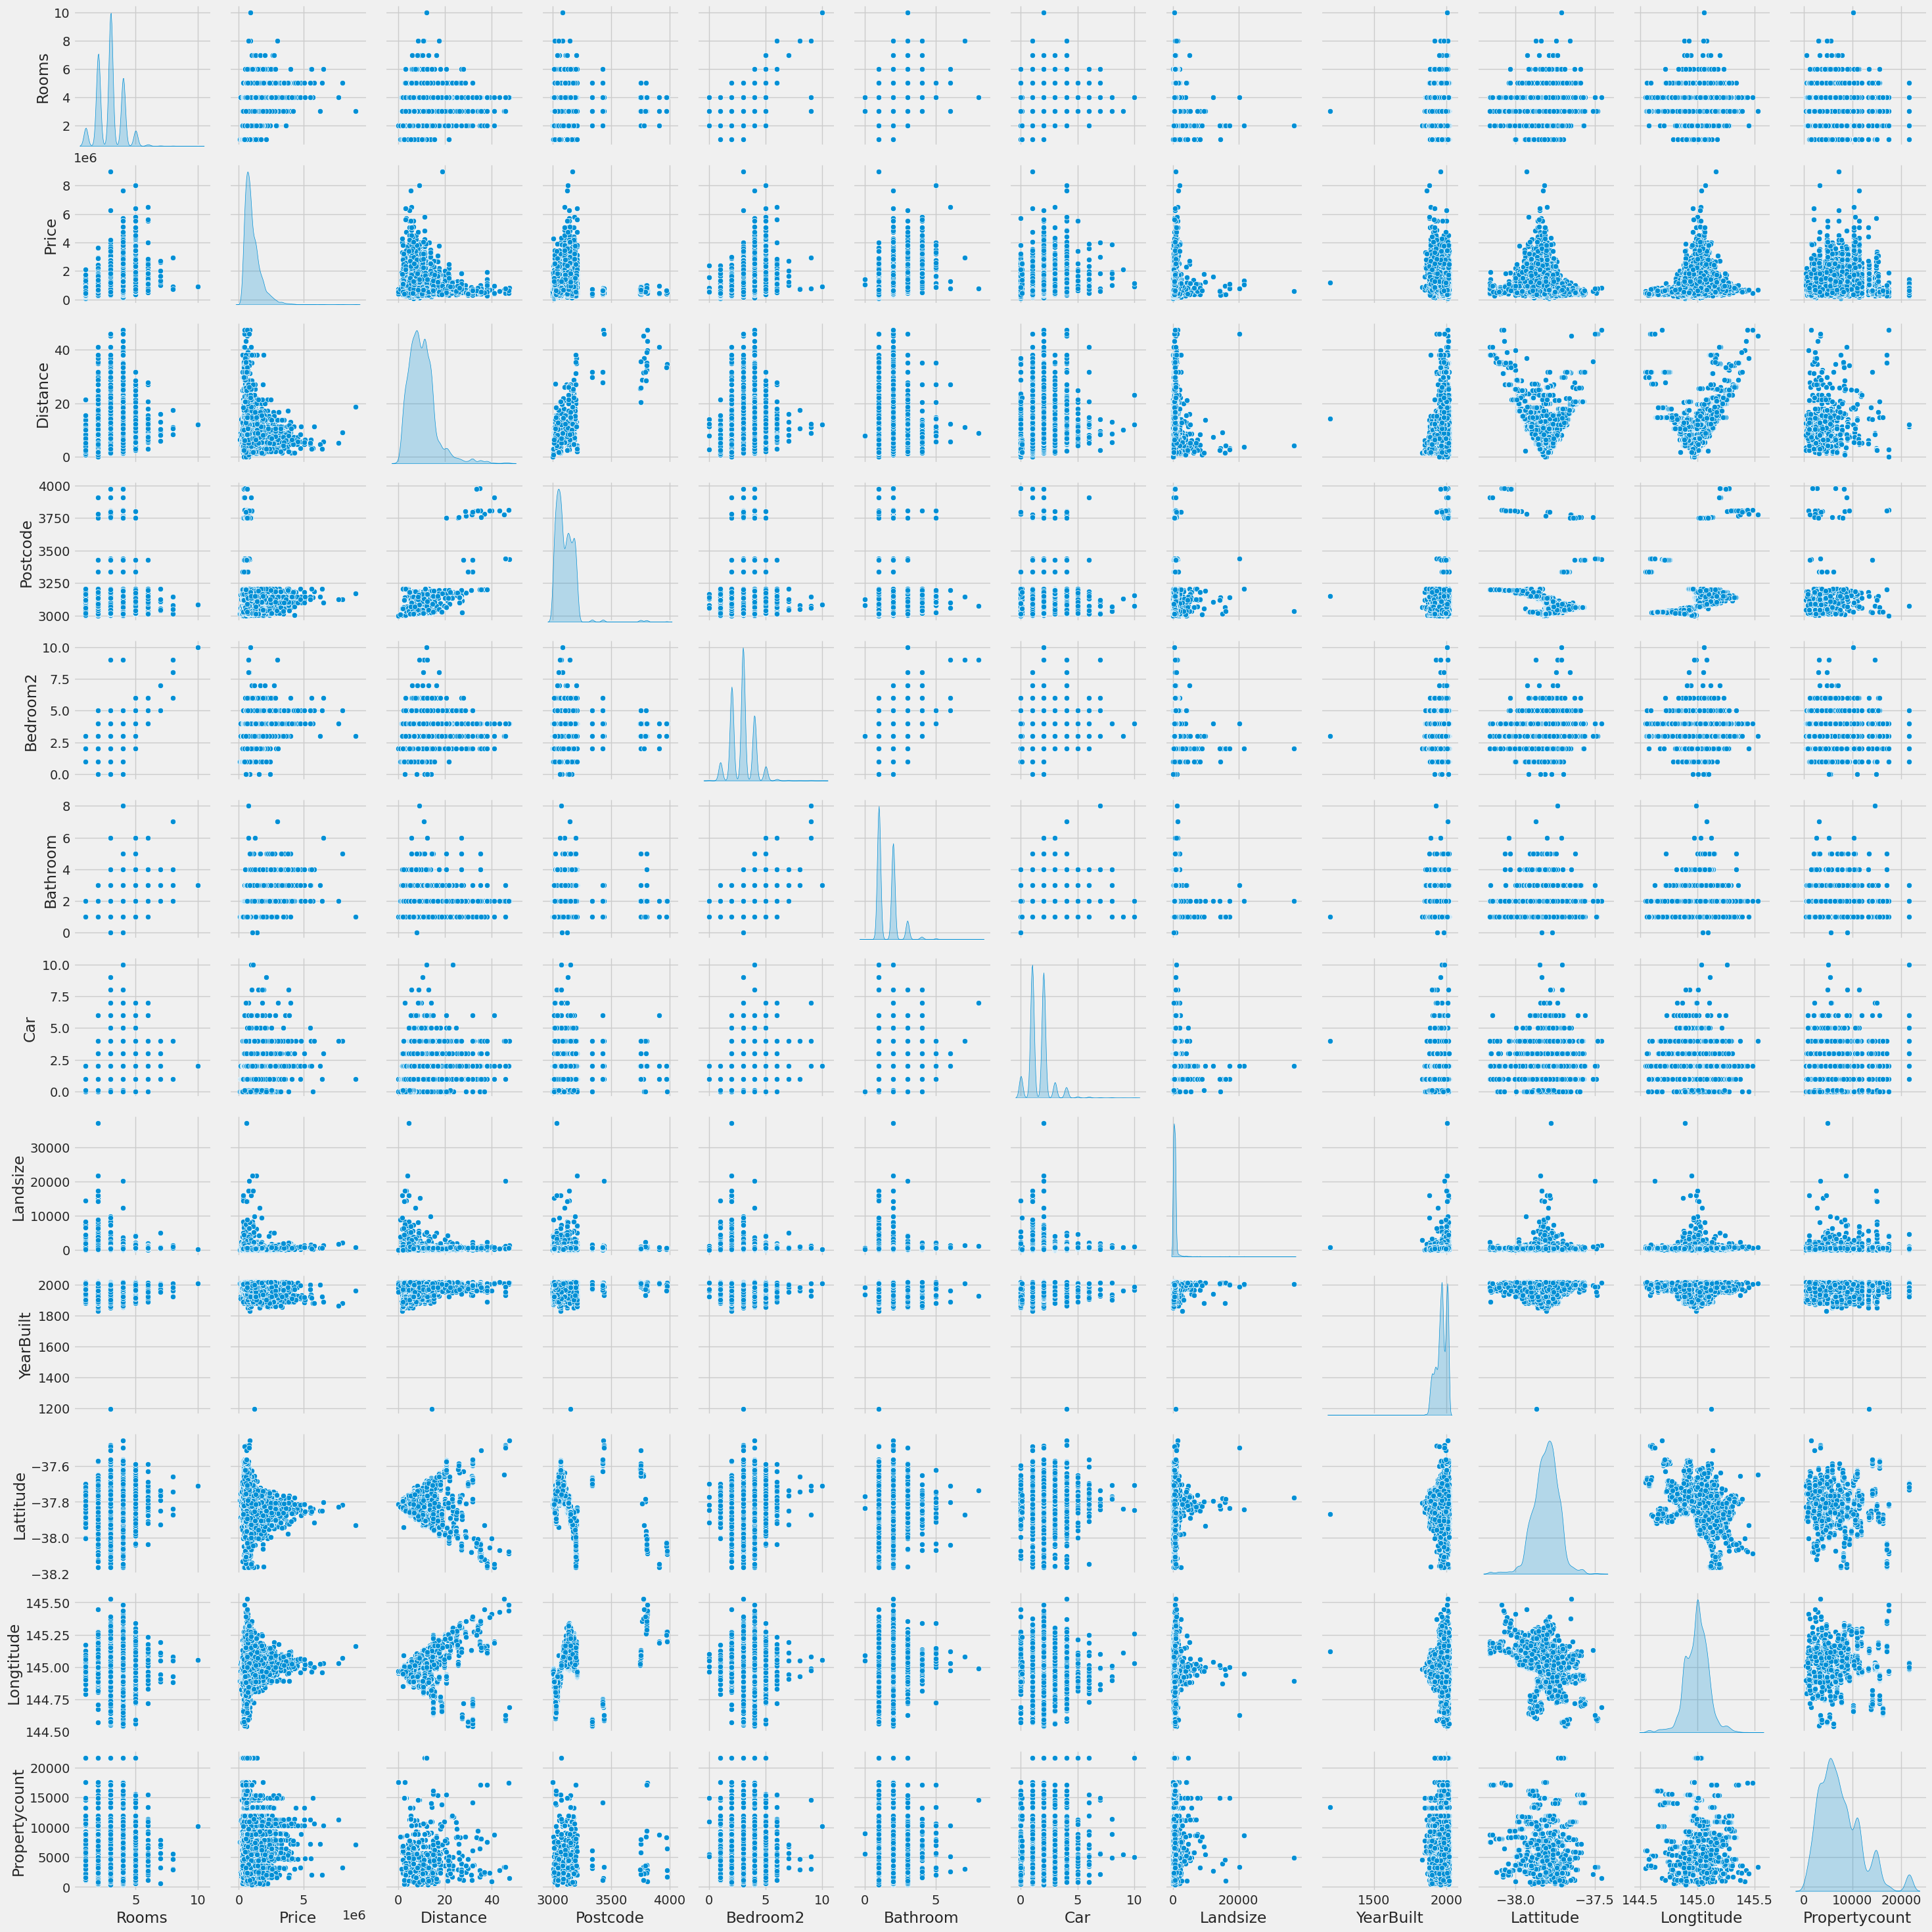

In [253]:
#Lets review the overall relationships with our new data!

sns.pairplot(data=df, diag_kind='kde')

In [172]:
#We can see some clustering but before we get ahead of ourselves lets check the skew of the new data, note that this only works for int values! 
preprocess_df_skew = df.copy()

preprocess_df_skew = preprocess_df_skew[['Rooms', 'Distance','Bedroom2', 'Bathroom', 'Car', 'Postcode',
       'Landsize', 'YearBuilt', 'Lattitude',
       'Longtitude','Propertycount', 'Price']]

preprocess_df_skew.skew()


Rooms             0.364406
Distance          1.709590
Bedroom2          0.402572
Bathroom          1.330265
Car               1.483037
Postcode          3.946512
Landsize         15.949461
YearBuilt        -1.557954
Lattitude        -0.393847
Longtitude       -0.220479
Propertycount     1.046884
Price             2.419124
dtype: float64

In [180]:
# some very skewed columns! Lets take these and run them through a function that will help us with normalising the relvant columns later

new_skew_dict = {'Rooms':0.364406,
'Distance':1.709590,
'Bedroom2':0.402572,
'Bathroom':1.330265,
'Car':1.483037,
'Postcode':3.946512,
'Landsize':15.949461,
'YearBuilt':-1.557954,
'Lattitude':-0.393847,
'Longtitude':-0.220479,
'Propertycount':1.046884,
'Price':2.419124}

new_highly_skewed = []
new_moderatley_skewed = []
new_pretty_symetrical = []


for k, v in new_skew_dict.items():
    if v <= -1 or v > 1:
        print(f"Highly skewed: {k}, value: {v}")
        new_highly_skewed.append(k)
    elif (-1 < v <= -0.5) or (0.5 <= v < 1):
        print(f"Moderately skewed: {k}, value: {v}")
        new_moderatley_skewed.append(k)
    elif -0.5 < v < 0.5:
        print(f"Approximately symmetrical: {k}, value: {v}")
        new_pretty_symetrical.append(k)

Approximately symmetrical: Rooms, value: 0.364406
Highly skewed: Distance, value: 1.70959
Approximately symmetrical: Bedroom2, value: 0.402572
Highly skewed: Bathroom, value: 1.330265
Highly skewed: Car, value: 1.483037
Highly skewed: Postcode, value: 3.946512
Highly skewed: Landsize, value: 15.949461
Highly skewed: YearBuilt, value: -1.557954
Approximately symmetrical: Lattitude, value: -0.393847
Approximately symmetrical: Longtitude, value: -0.220479
Highly skewed: Propertycount, value: 1.046884
Highly skewed: Price, value: 2.419124


In [181]:
# quite a few highly skewed but a significant improvement from the begining! 
for i in new_highly_skewed:
    print(i)

Distance
Bathroom
Car
Postcode
Landsize
YearBuilt
Propertycount
Price


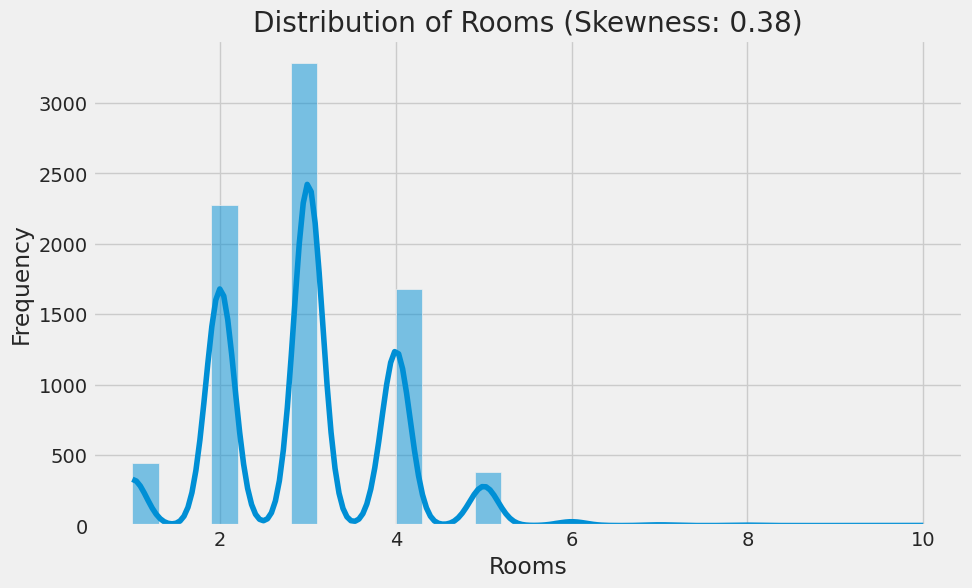

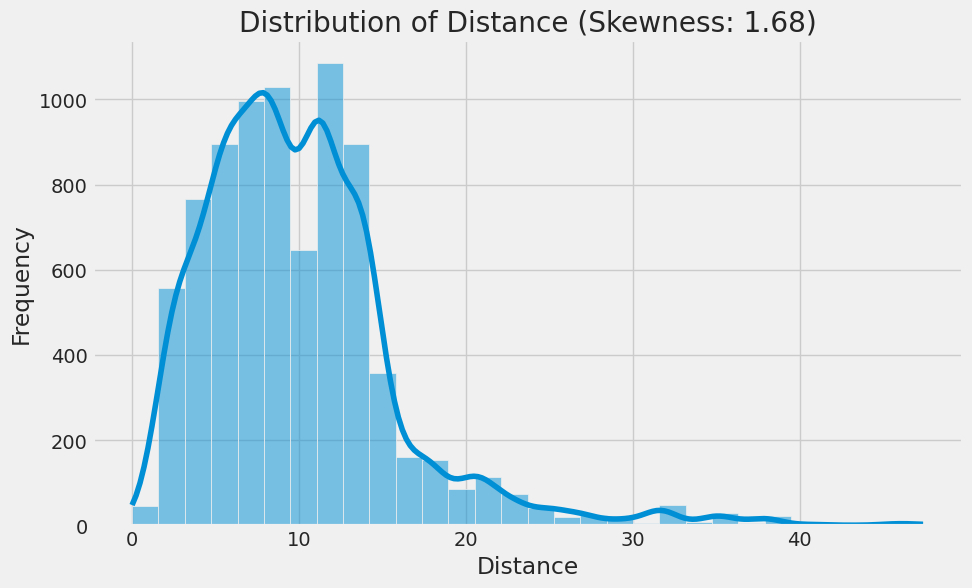

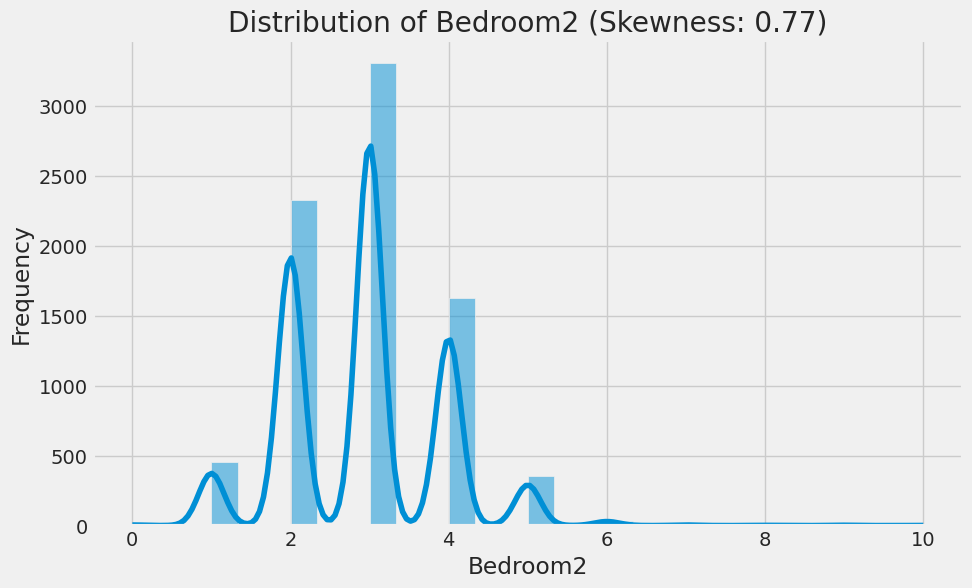

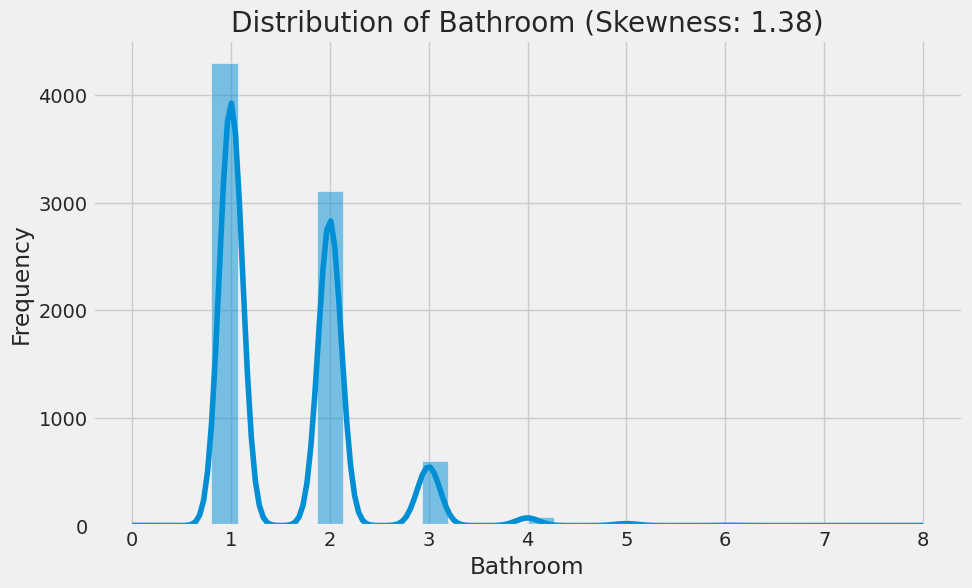

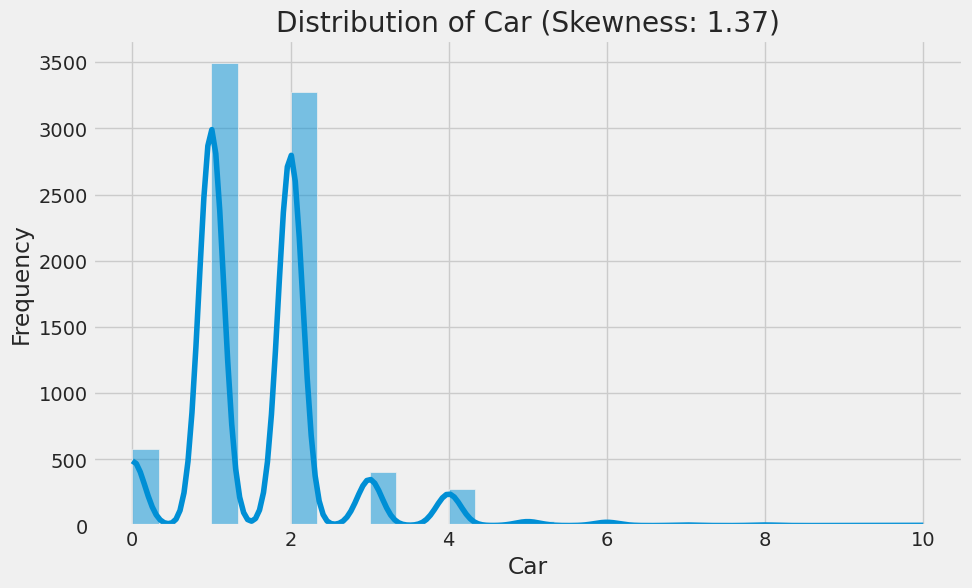

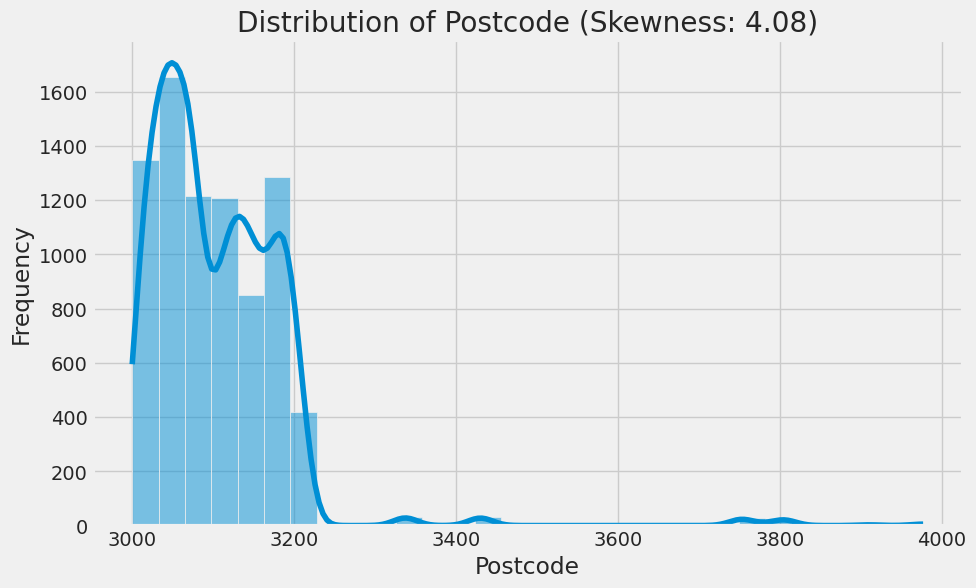

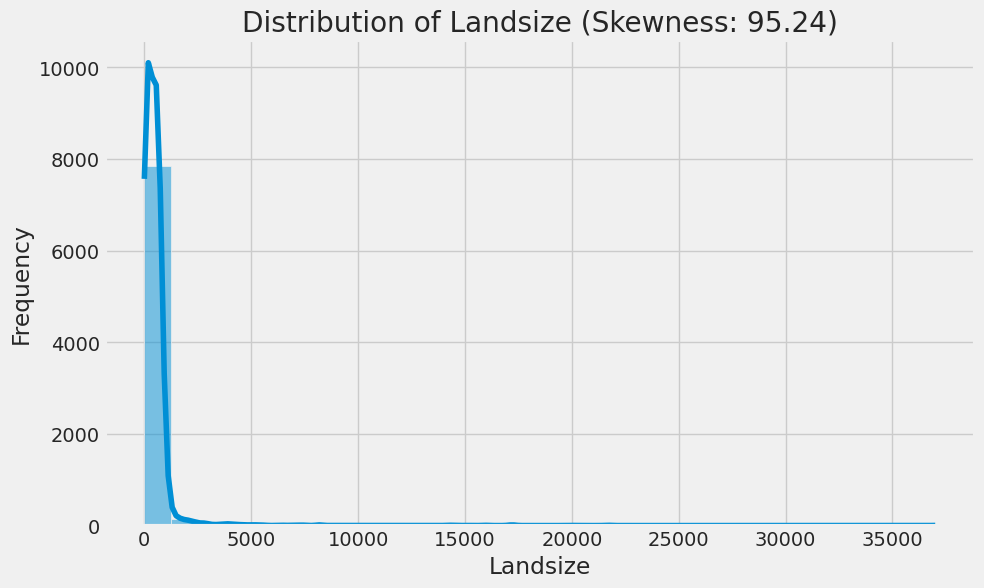

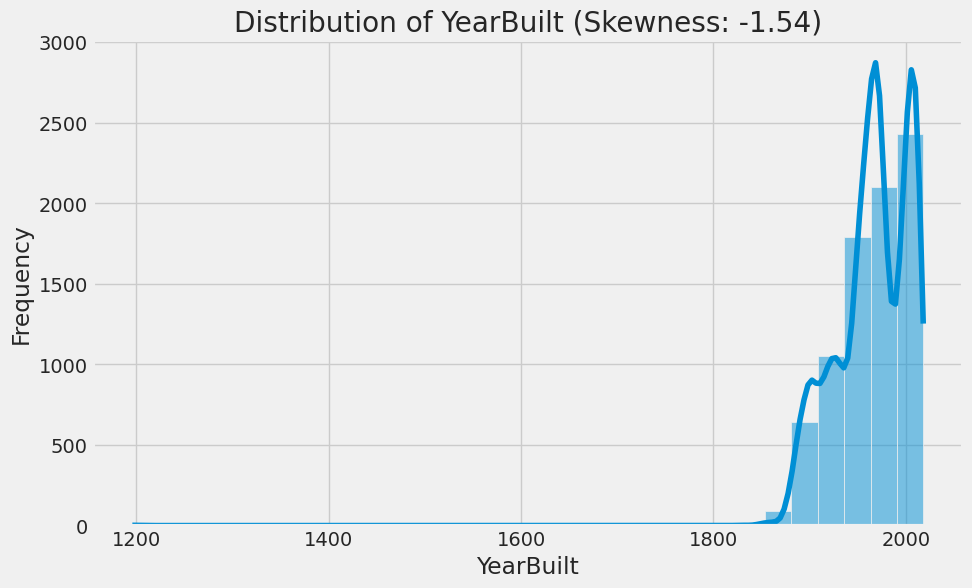

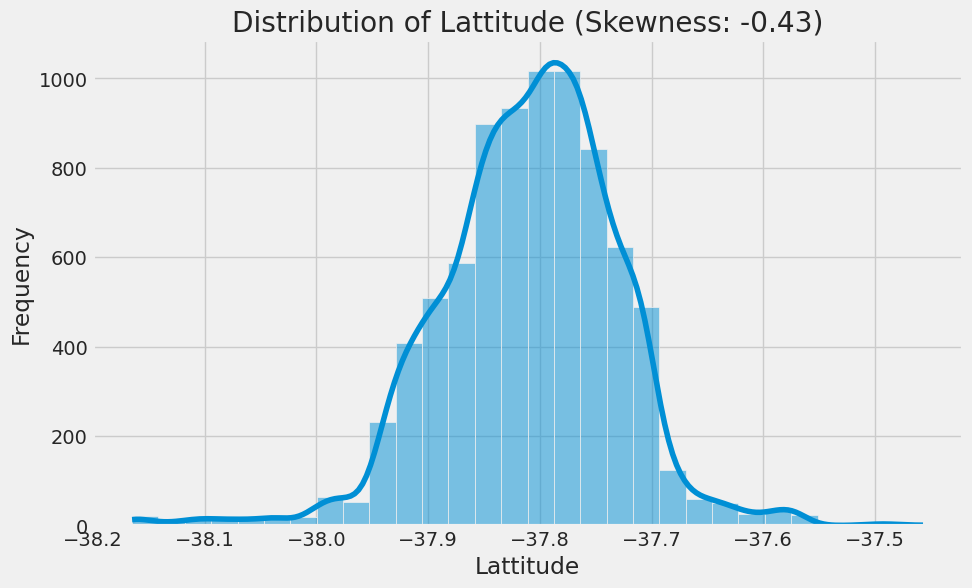

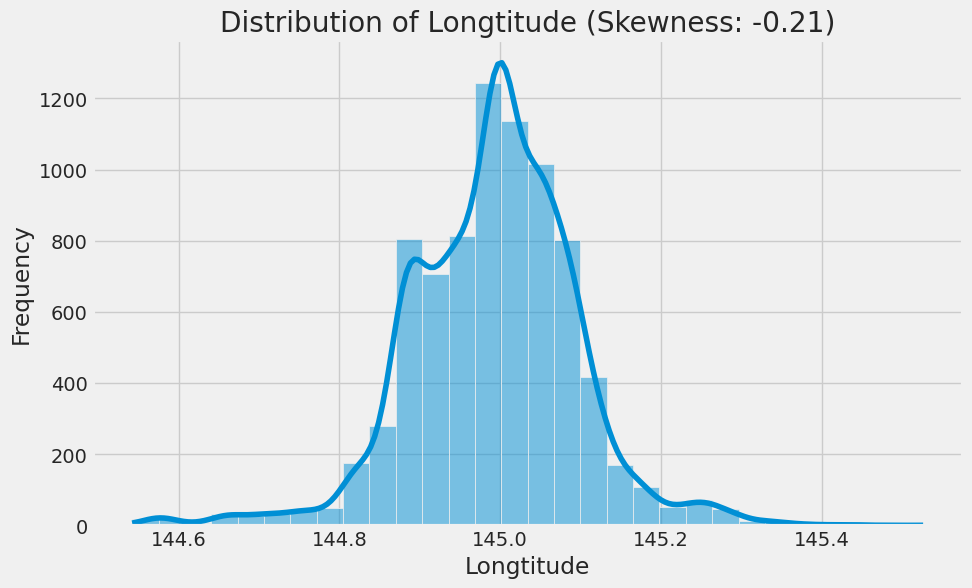

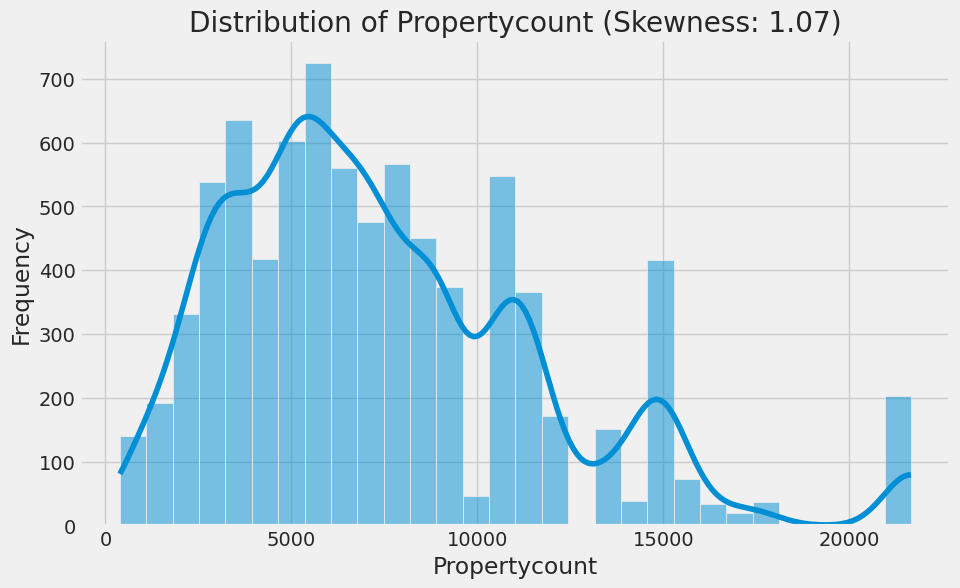

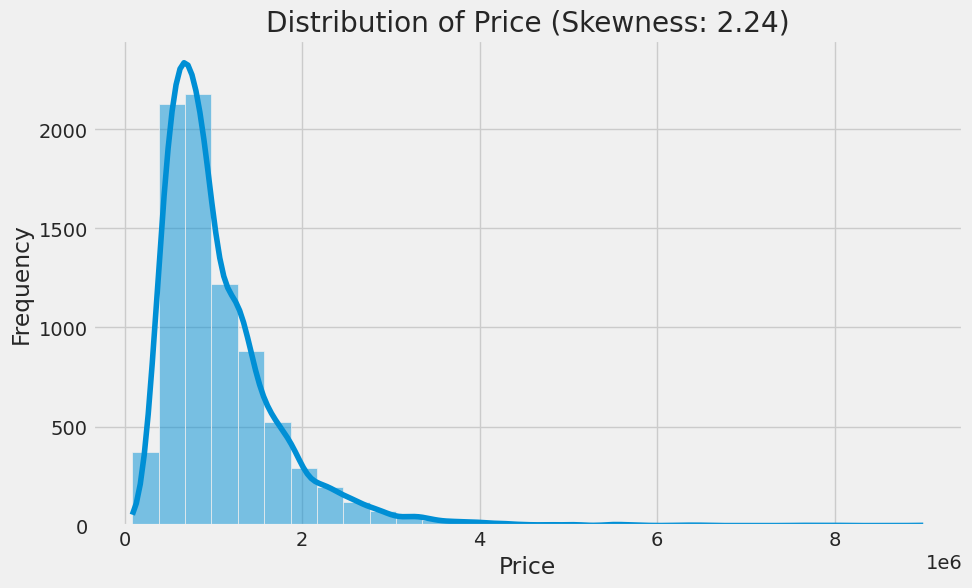

In [182]:
# lets take a look into our skewed data  

for feature in preprocess_df_skew:
    plt.figure(figsize=(10, 6))
    sns.histplot(preprocess_df_skew[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature} (Skewness: {skew_dict[feature]:.2f})')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [183]:
# now lets apply the log function to normalise these and see what they look like 

transformed_data = preprocess_df_skew.copy()

for feature in new_highly_skewed:
    print(f"{feature}")
    # Ensure all values are positive before applying log transformation
    # You might need to adjust this step based on the actual minimum values in your data
    min_value = transformed_data[feature].min()
    if min_value <= 0:
        # Adjust values to be positive. The constant should be carefully chosen.
        print(f"{feature}:{min_value}")
        transformed_data[feature] += (abs(min_value) + 0.01)
    
    # Apply log transformation
    transformed_data[feature] = np.log(transformed_data[feature])
    

Distance
Distance:0.0
Bathroom
Bathroom:0.0
Car
Car:0.0
Postcode
Landsize
Landsize:0.0
YearBuilt
Propertycount
Price


In [184]:
transformed_data.skew()

Rooms            0.364406
Distance        -1.207528
Bedroom2         0.402572
Bathroom         0.051727
Car             -2.806882
Postcode         3.387816
Landsize        -1.740652
YearBuilt       -2.558556
Lattitude       -0.393847
Longtitude      -0.220479
Propertycount   -0.700861
Price            0.244348
dtype: float64

In [188]:
# Lets see how the same data does with box cox 

df_feature_scale = preprocess_df_skew.copy()

for feature in new_highly_skewed:
    # if feature == "Postcode" pass
    # Ensure all values are positive before applying Box-Cox transformation
    min_value = df_feature_scale[feature].min()
    if min_value <= 0:
        # Adjust values to be positive. Choose a constant carefully.
        df_feature_scale[feature] += (abs(min_value) + 0.01)
    
    # Apply Box-Cox transformation
    df_feature_scale[feature], fitted_lambda = boxcox(df_feature_scale[feature])
    print(f"{feature}: Lambda={fitted_lambda:.2f}")



Distance: Lambda=0.31
Bathroom: Lambda=-0.02
Car: Lambda=0.63
Postcode: Lambda=-16.73
Landsize: Lambda=0.31
YearBuilt: Lambda=15.53
Propertycount: Lambda=0.34
Price: Lambda=-0.16


In [207]:
df_feature_scale.skew()

Rooms            0.364406
Distance         0.045753
Bedroom2         0.402572
Bathroom        -0.010017
Car              0.012896
Postcode         0.000000
Landsize        -0.397741
YearBuilt       -0.099334
Lattitude       -0.393847
Longtitude      -0.220479
Propertycount   -0.009874
Price            0.003106
dtype: float64

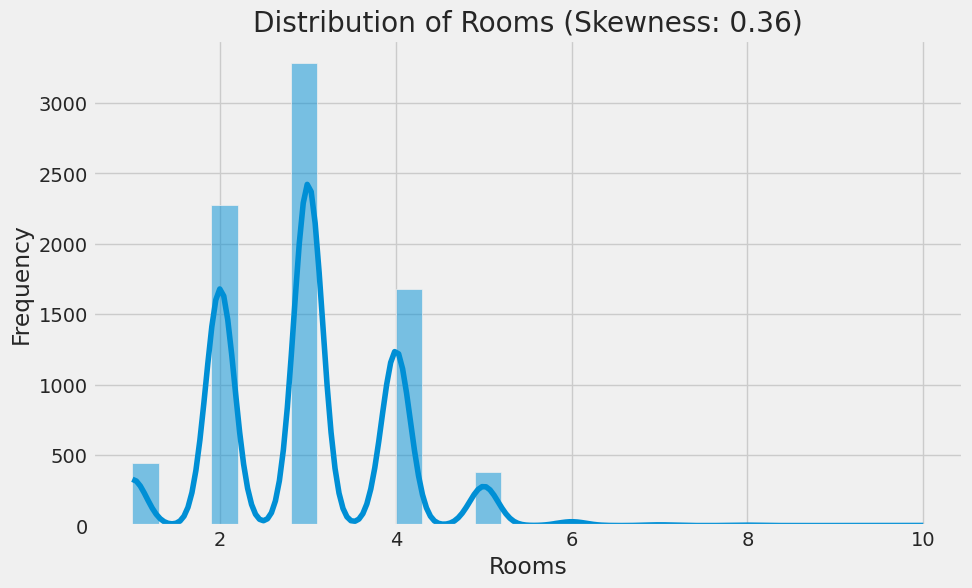

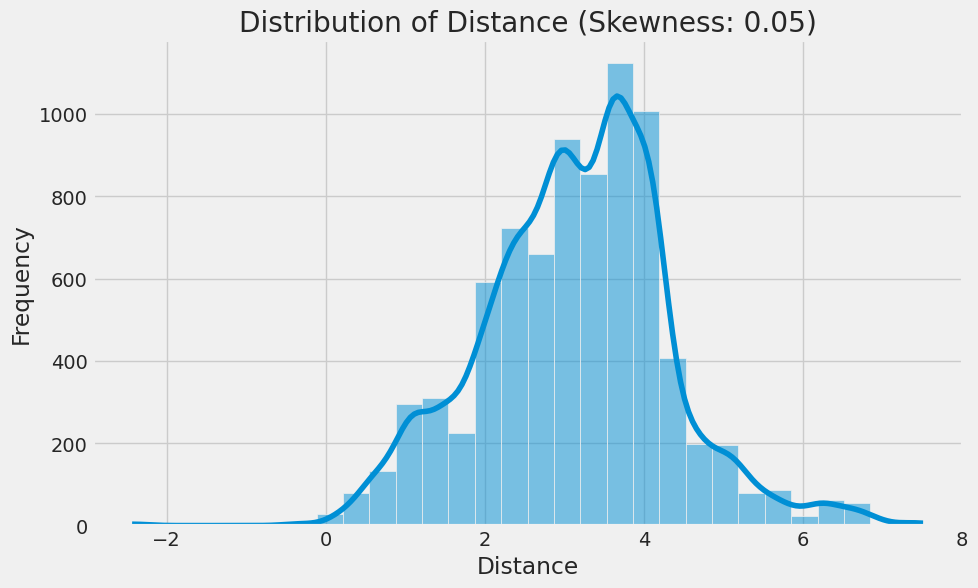

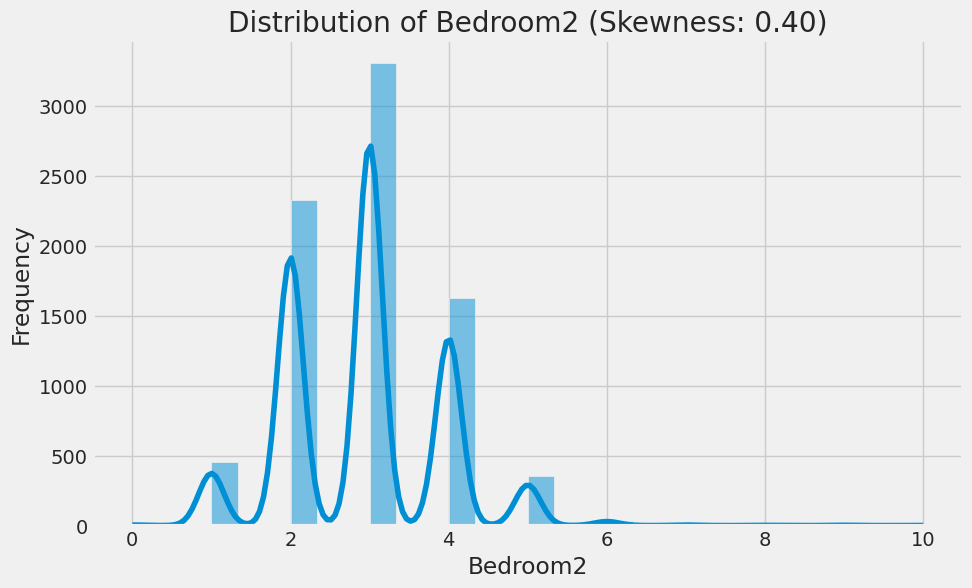

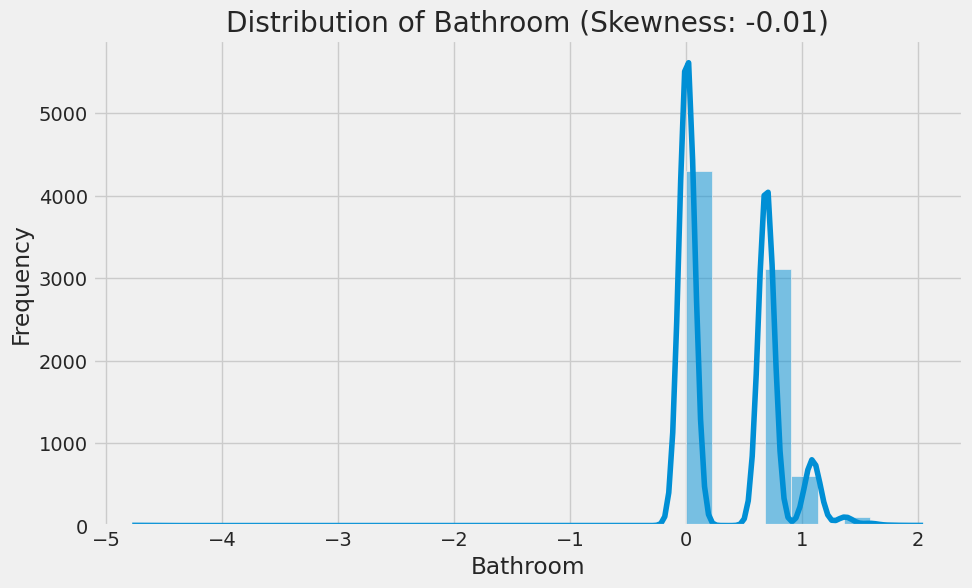

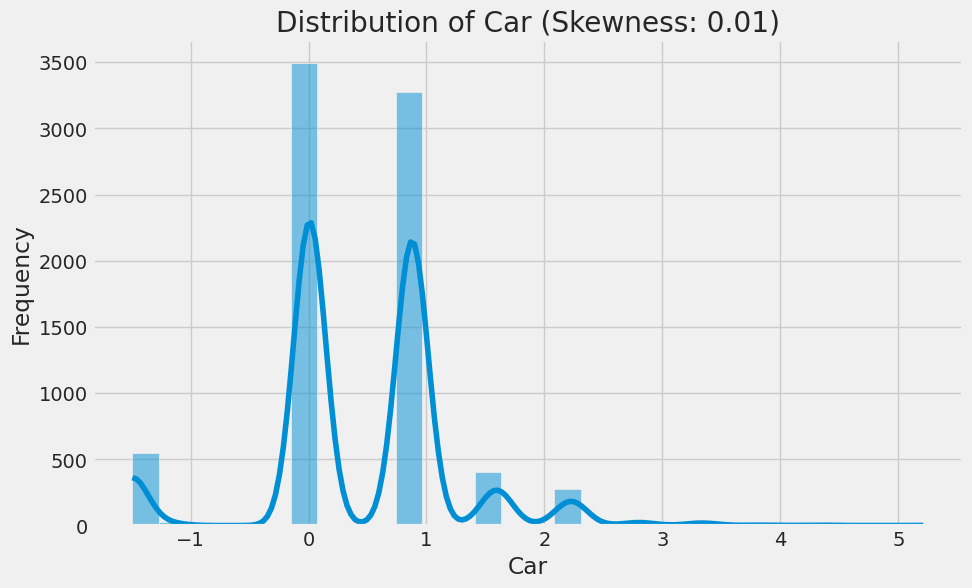

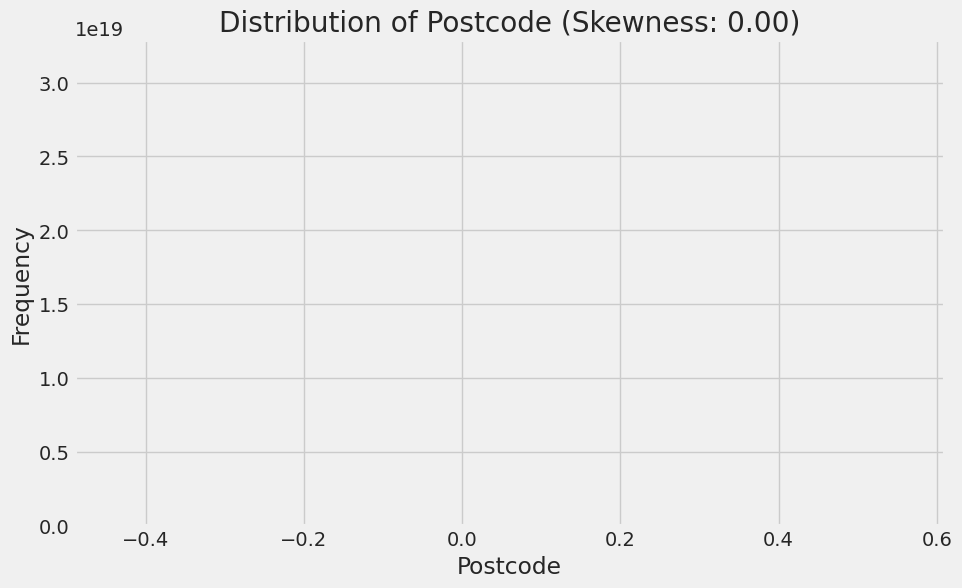

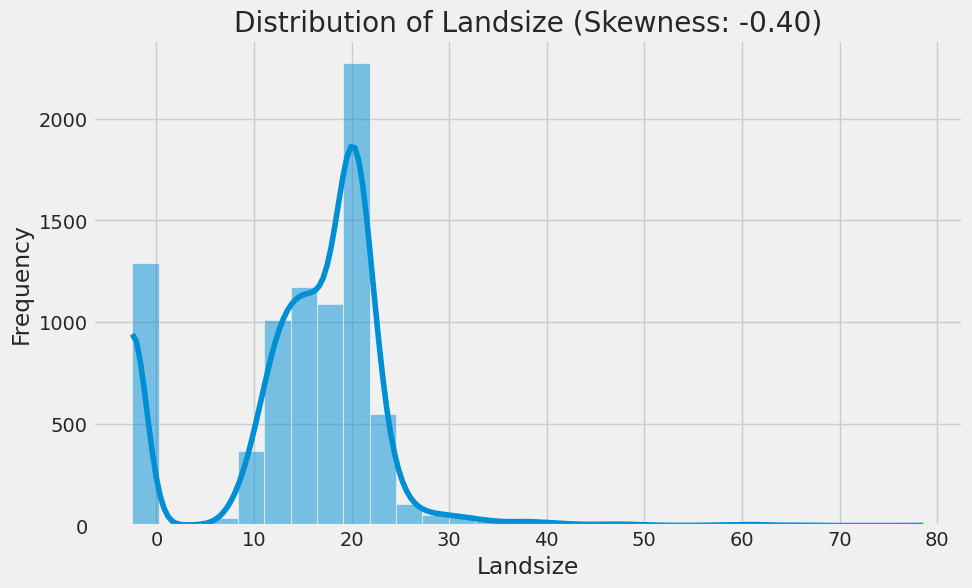

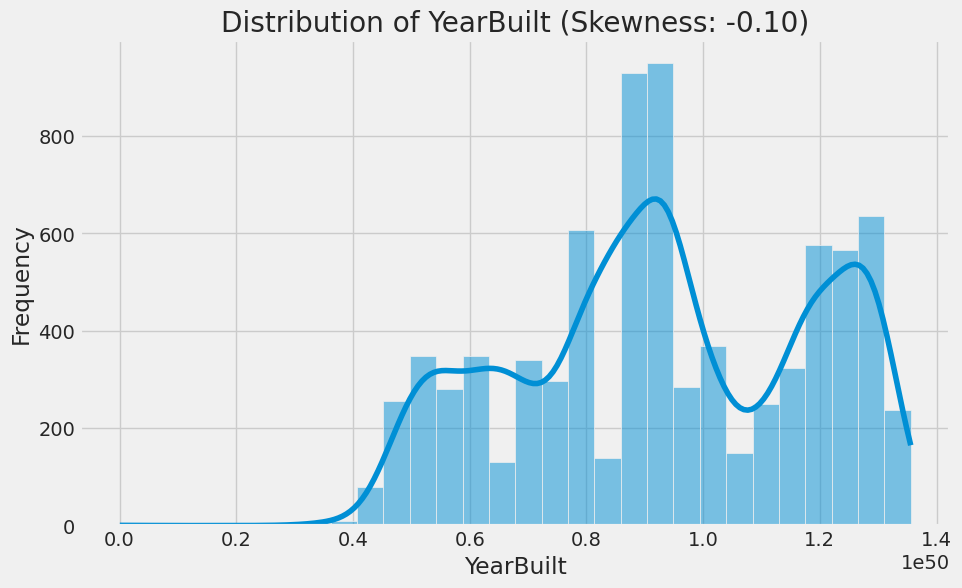

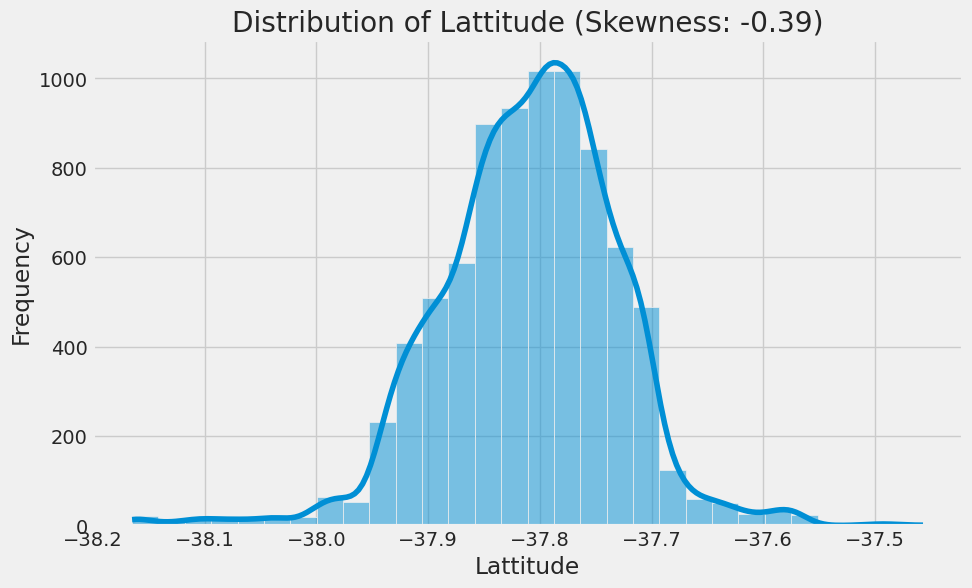

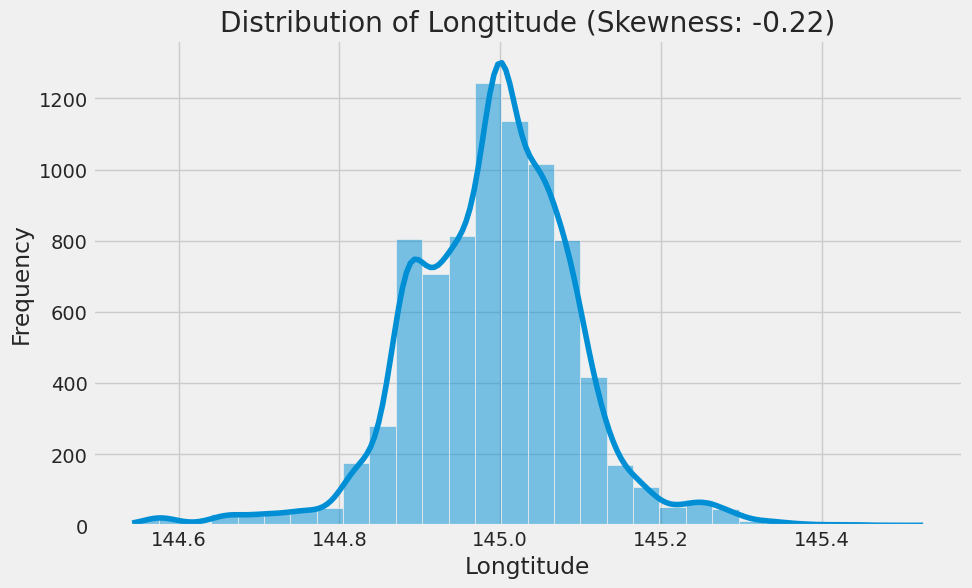

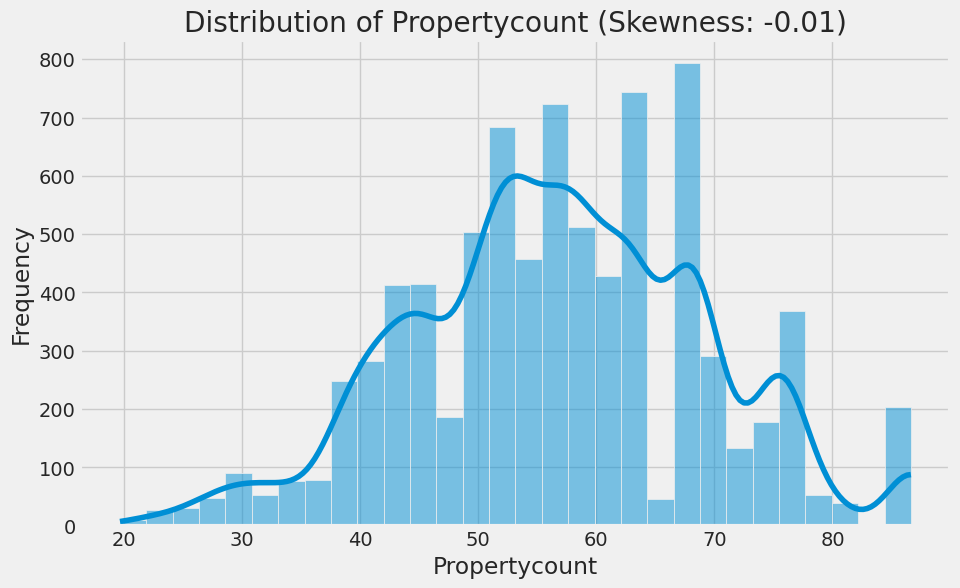

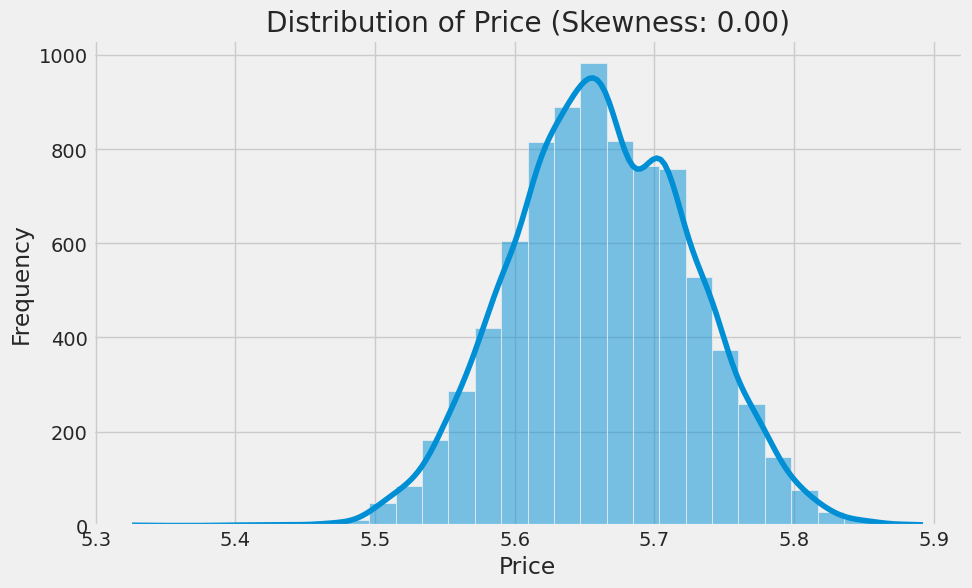

In [208]:
# Great! A significant improvement and the skew of our data is now more symetrical, ideal for passing to the model!

skew_dict = {'Rooms':0.364406,
'Distance':0.045753,
'Bedroom2':0.402572,
'Bathroom':-0.010017,
'Car':0.012896,
'Postcode':0.000000,
'Landsize':-0.397741,
'YearBuilt':-0.099334,
'Lattitude':-0.393847,
'Longtitude':-0.220479,
'Propertycount':-0.009874,
'Price':0.003106}

for feature in df_feature_scale.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_feature_scale[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature} (Skewness: {skew_dict[feature]:.2f})')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    

In [209]:
# Great I think we can agree that this is a better result than when we applied the log transformation. Lets continue!

df_preprocessed = df.copy()

for i in df_feature_scale:
    df_preprocessed[i] = df_feature_scale[i]

In [214]:
df_preprocessed.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [302]:
df_preprocessed.shape

(8110, 20)

In [215]:
# Perfect! Now we are done with preprocessing, exploritory analysis and normalisation lets get into the big stuff! Models!
# I will be showing a different variety of models so that you can better intuitivley understand the features of each model in relation to this dataset
# What this covers: Linear regression, Linear regression with polynomials, Linear regression with Ridge, Desicion Tree Regression, Random Forrest and XGBoost 
# Now lets split are data set into a test train split!
# first we need to identify are target variable Price

df_Lin_reg = df_preprocessed.copy() 

X = df_Lin_reg.drop('Price', axis=1)
y = df_Lin_reg['Price']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [216]:
encoder = TargetEncoder(cols=['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname'])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

In [217]:
# Scale the features
scaler = StandardScaler()

# Fit on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test_encoded)

In [218]:
# now lets do some feature selection, here we will cover two differenct types, PCA and LassoCV
# Initialize PCA, choosing to keep components that explain 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the standardized training data and transform it
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the standardized test data
X_test_pca = pca.transform(X_test_scaled)

# Print the number of components
print(f"Number of PCA components: {pca.n_components_}")

Number of PCA components: 14


In [219]:
# LassoCV
lasso = LassoCV(cv=5).fit(X_train_scaled, y_train)
important_features = X_train_encoded.columns[lasso.coef_ != 0]

print("Important features according to Lasso:", important_features)

Important features according to Lasso: Index(['Suburb', 'Address', 'Distance', 'Bedroom2', 'Bathroom', 'CouncilArea'], dtype='object')


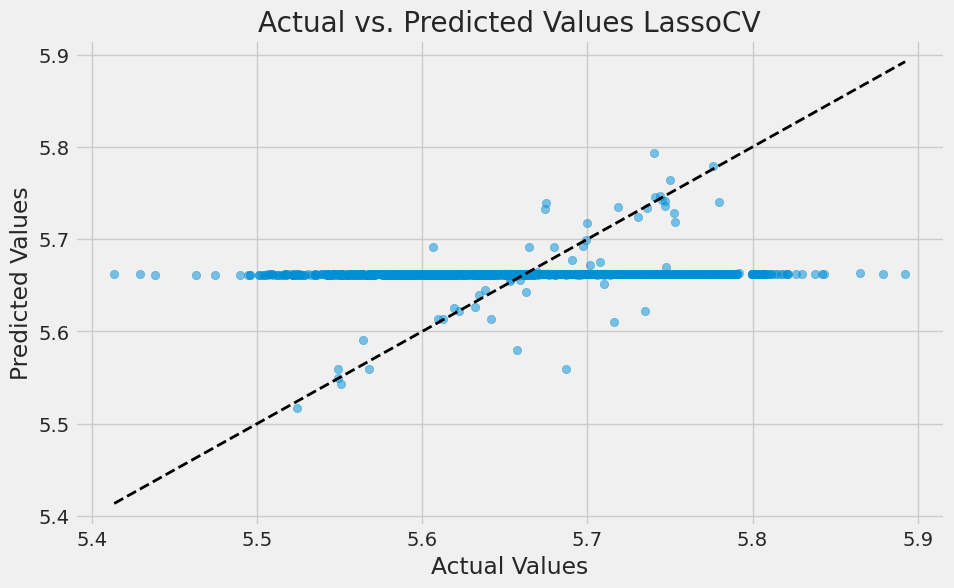

Mean Squared Error: 0.003944834704525848
R^2 Score: 0.01922277173754583


In [222]:
# will need to run everything through are data pipeline, lets first try with the features suggested by LassoCV
# rember to add price as this is our Y variable!
features = df_Lin_reg[['Suburb', 'Address', 'Distance', 'Bedroom2', 'Bathroom', 'CouncilArea', 'Price']]

X = features.drop('Price', axis=1)
y = features['Price']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#encode the categorcial variables! Ive gone for target encoding as this is a high cardinality dataset! 

encoder = TargetEncoder(cols=[
 'Address',
    'Suburb',
 'CouncilArea',])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

#intialise the model 
model_linreg = LinearRegression()
model_linreg .fit(X_train_encoded, y_train)

# make the magic happen 
y_pred_linreg  = model_linreg.predict(X_test_encoded)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linreg, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.show()

mse = mean_squared_error(y_test, y_pred_linreg)
r2 = r2_score(y_test, y_pred_linreg)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

In [ ]:
# So as you can see not great. Weve taken nessecary steps to explore, preprocess and select our data and features. Theres two more approaches we can try! 

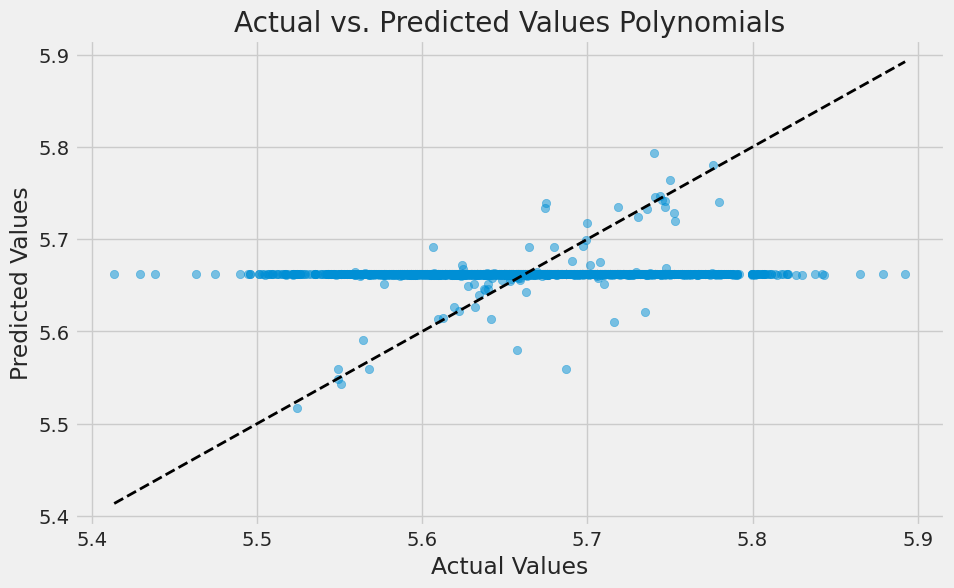

Mean Squared Error: 0.003959907231433628
R^2 Score: 0.015475392627702811


In [228]:
# We can bust all the big boys out and run pile the polynomials!
# will need to run everything through our data pipeline 
# rember to add price as this is our Y variable!
features = df_Lin_reg[['Suburb', 'Address', 'Distance', 'Bedroom2', 'Bathroom', 'CouncilArea', 'Price']]

X = features.drop('Price', axis=1)
y = features['Price']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

encoder = TargetEncoder(cols=[
 'Address', 'SellerG'])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

scaler = StandardScaler()

# Fit on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test_encoded)

# Create polynomial features
poly = PolynomialFeatures(degree=5, include_bias=False)

# Fit on the training data and transform it
X_train_poly = poly.fit_transform(X_train_scaled)

# Transform the test data using the same transformation
X_test_poly = poly.transform(X_test_scaled)



model_linregpoly = LinearRegression()
model_linregpoly.fit(X_train_poly, y_train)

# Make predictions with polynomial features
y_pred_poly = model_linregpoly.predict(X_test_poly)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Polynomials')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.show()

mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

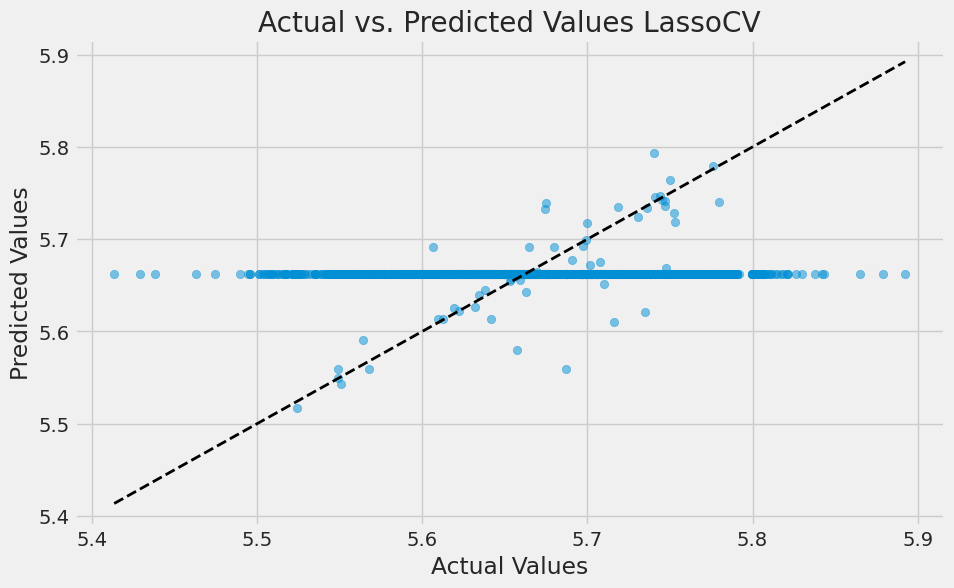

Mean Squared Error (Ridge): 0.0039625125992950325
R^2 Score (Ridge): 0.01482763786454866


In [229]:
# The hail mary, the last resort, using ridge pipeline.  
# Using polynomial features
features = df_Lin_reg[['Address',
'Price',
                        ]]

X = features.drop('Price', axis=1)
y = features['Price']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

encoder = TargetEncoder(cols=[
 'Address',])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Create polynomial features
poly = PolynomialFeatures(degree=1, include_bias=False)

# Fit on the training data and transform it
X_train_poly = poly.fit_transform(X_train_scaled)

# Transform the test data using the same transformation
X_test_poly = poly.transform(X_test_scaled)

# Define a pipeline with StandardScaler and Ridge Regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('ridge', Ridge(alpha=1))  # Ridge regression with a chosen alpha value
])

# Fit the model
ridge_pipeline.fit(X_train_poly, y_train)

# Make predictions
y_pred_ridge = ridge_pipeline.predict(X_test_poly)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Ridge')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.show()

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (Ridge): {mse_ridge}")
print(f"R^2 Score (Ridge): {r2_ridge}")

In [ ]:
#As you can see linear regression in this context is not quite grasping the complex relationships hidden within the data no matter the approach we use. 

In [141]:
# after having tinkered with Feature selection, normalisation, hypertuning, data exploration, it is safe to say we should change approach 

In [ ]:
#Enter Regression Trees! 

# Great for high cardinality datasets
# more robust against skewed data 
# A true all rounder! 

In [230]:
df_regtree = df_preprocessed.copy()

In [272]:
# For easy substitution of features
df_regtree.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

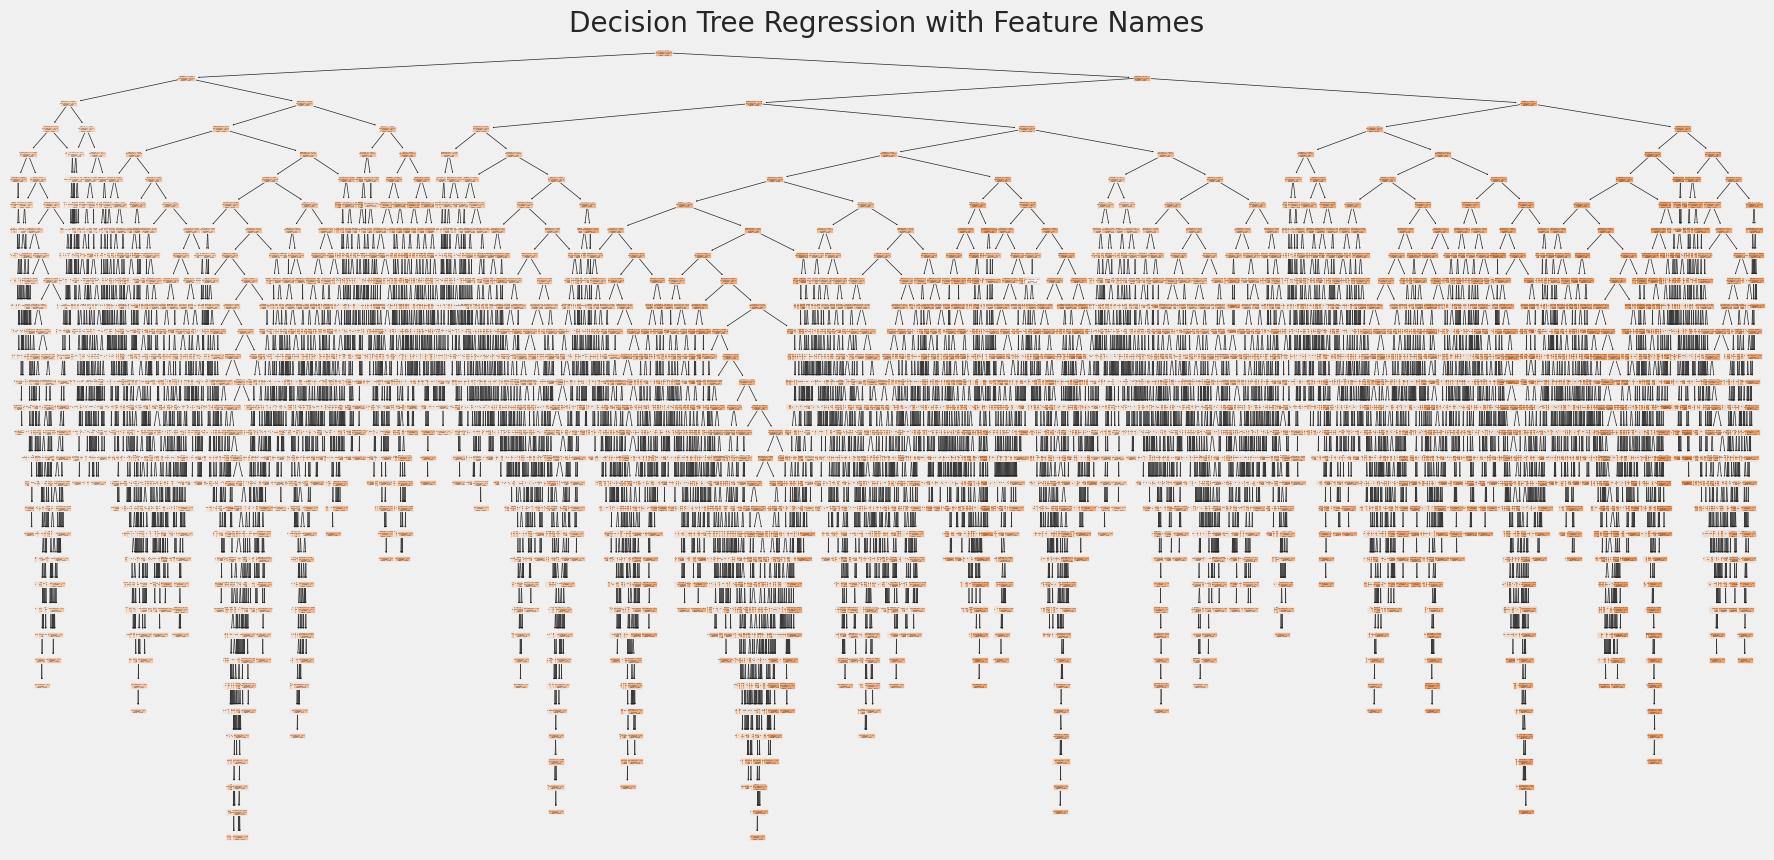

Mean Squared Error: 0.001134456072622278
Mean Absolute Error: 0.024858475199101056
R-squared: 0.7136797684944044


In [289]:
# rember to add price as this is our Y variable!
features = df_regtree[['Suburb', 'Rooms', 'Type', 'Price', 'SellerG', 'Distance','Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea','Lattitude', 'Longtitude',
       'Regionname', 'Propertycount']] #'Address','YearBuilt', #Method, #Date

X = features.drop('Price', axis=1)
y = features['Price']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = TargetEncoder(cols=['Suburb', 
                              'CouncilArea',
                             'Type',
                             'SellerG',
                             'Regionname'])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

scaler = StandardScaler()

# Fit on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test_encoded)

# Initialize the model
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
regressor.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_predictions = regressor.predict(X_test_scaled)

# Get feature names from the DataFrame
feature_names = X.columns

# Plot the tree with feature names
plt.figure(figsize=(20,10))
plot_tree(regressor, feature_names=feature_names, filled=True)
plt.title("Decision Tree Regression with Feature Names")
plt.show()
# Evaluate the model
mse = mean_squared_error(y_test, y_predictions)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(y_test, y_predictions)
print(f"Mean Absolute Error: {mae}")
r_squared = r2_score(y_test, y_predictions)
print(f"R-squared: {r_squared}")

In [283]:
# This is a great score! And with relativley simple implementation. Lets check which features it found to have the most important!

# Check feature importance
importances = regressor.feature_importances_
print(dict(zip(feature_names, importances)))


{'Suburb': 0.2208203799874357, 'Rooms': 0.09048405435713575, 'Type': 0.3102888724949641, 'Method': 0.009650132397666917, 'SellerG': 0.020773488646678044, 'Distance': 0.04842175965803956, 'Postcode': 0.0, 'Bedroom2': 0.01125612643798571, 'Bathroom': 0.028472523997989146, 'Car': 0.00966190389150225, 'Landsize': 0.06406718238628696, 'CouncilArea': 0.0713357177568676, 'Lattitude': 0.05798713296629773, 'Longtitude': 0.0355056420571923, 'Regionname': 0.009379458067068342, 'Propertycount': 0.011895624896889957}


In [ ]:
#This is a significant improvement from our 1st attempt but i think we can still do better! 

In [ ]:
# Without 'Address','YearBuilt', #Method, #Date, 'Postcode', 'Lattitude', 'Longtitude' and no max_depth specified:
# Mean Squared Error: 0.001140163870598544
# Mean Absolute Error: 0.025311174017459883
# R-squared: 0.7122392032073113

In [297]:
#XGBoost 
df_xgboost = df_preprocessed.copy()

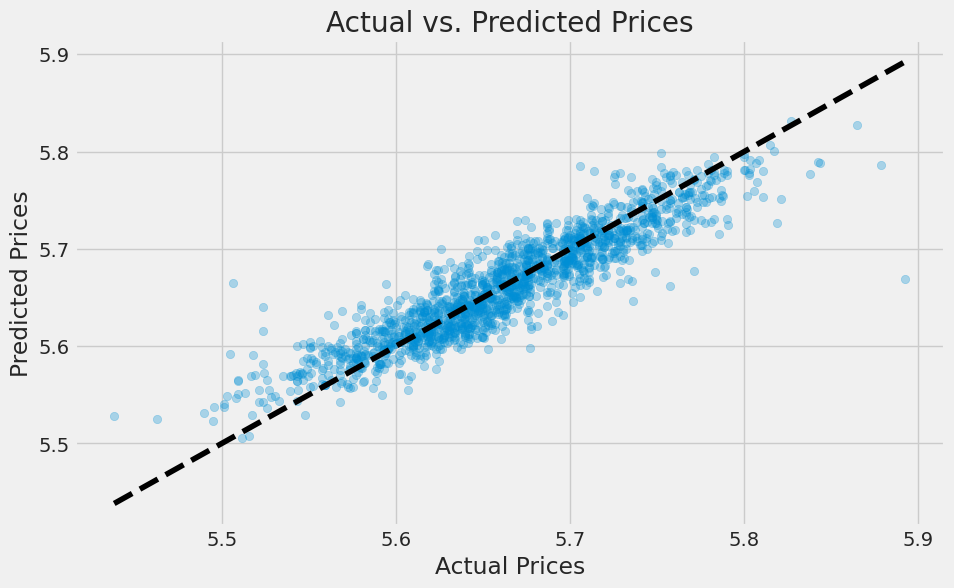

Mean Squared Error: 0.0006503528072793398
Mean Absolute Error: 0.019322149666353094
R-squared: 0.8358603996802495


In [301]:
# rember to add price as this is our Y variable!
features = df_xgboost[['Suburb', 'Rooms', 'Type', 'Price', 'SellerG', 'Distance','Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea','Lattitude', 'Longtitude',
       'Regionname', 'Propertycount']] #'Address','YearBuilt', #Method, #Date

X = features.drop('Price', axis=1)
y = features['Price']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding categorical features and scaling
encoder = TargetEncoder(cols=['Suburb', 'CouncilArea', 'Type', 'SellerG', 'Regionname'])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_predictions = xgb_regressor.predict(X_test_scaled)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Reference line
plt.title('Actual vs. Predicted Prices RandomForrest')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_predictions)
mae = mean_absolute_error(y_test, y_predictions)
r_squared = r2_score(y_test, y_predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r_squared}")

In [ ]:
# Another great improvement, Lets see if we can get this any higher utilising random forrests

In [290]:
df_randomforrest = df_preprocessed.copy()

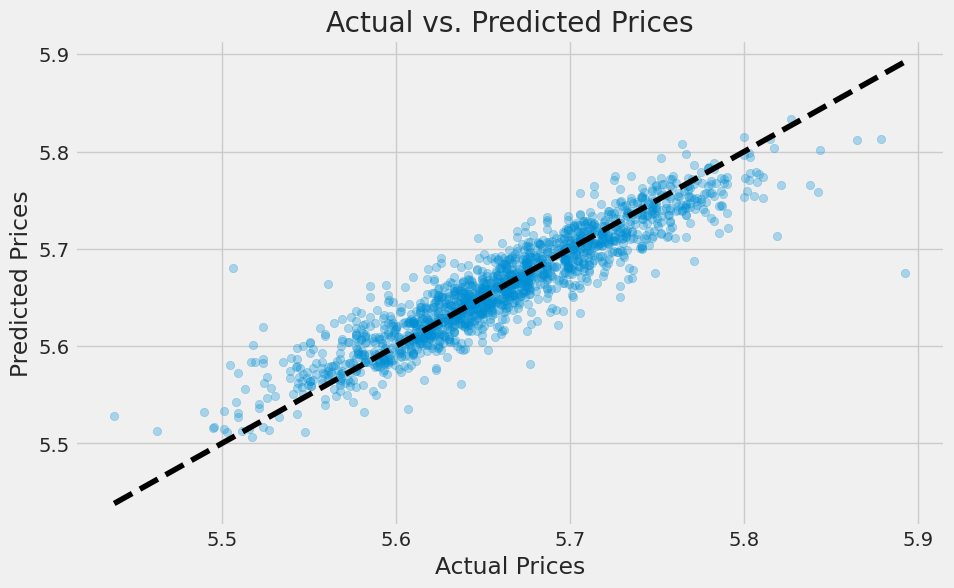

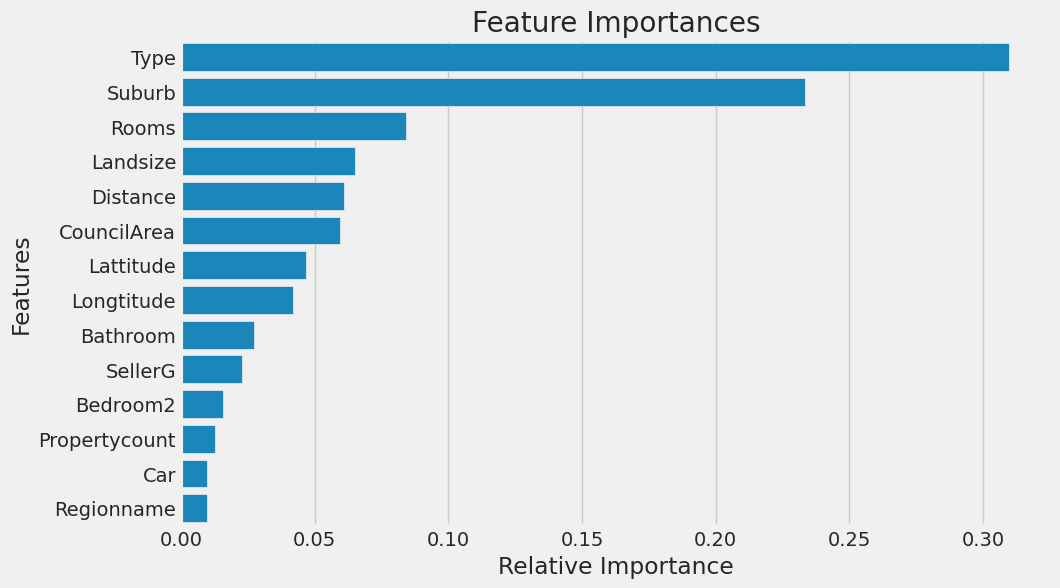

Mean Squared Error: 0.0005979461226932811
Mean Absolute Error: 0.017970152556738592
R-squared: 0.8490870855125506


In [303]:
# rember to add price as this is our Y variable!
features = df_randomforrest[['Suburb', 'Rooms', 'Type', 'Price', 'SellerG', 'Distance','Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea','Lattitude', 'Longtitude',
       'Regionname', 'Propertycount']] #'Address','YearBuilt', #Method, #Date

X = features.drop('Price', axis=1)
y = features['Price']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding categorical features and scaling
encoder = TargetEncoder(cols=['Suburb', 'CouncilArea', 'Type', 'SellerG', 'Regionname'])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Initialize the Random Forest regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_predictions = random_forest_regressor.predict(X_test_scaled)


# For visulising feature importances
feature_importances = random_forest_regressor.feature_importances_
features = X_train_encoded.columns

# Create a pandas series to make plotting easier
importances = pd.Series(feature_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Reference line
plt.title('Actual vs. Predicted Prices XGBoost')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_predictions)
mae = mean_absolute_error(y_test, y_predictions)
r_squared = r2_score(y_test, y_predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r_squared}")

In [ ]:
# And there you have it! This is our top scoring model! 
# Thanks to all of those who stuck through till the end of this notebook
# feel free to play around with any of these! 